# Feature Engineering
TODO: Create pipeline for process below to run each dataset through

In [1]:
# load modules
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.api.types import is_float_dtype
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
# read data
full_data = pd.read_csv('data/cumulative_data.csv')
train_data = pd.read_csv('data/train_data.csv')
test_data = pd.read_csv('data/test_data.csv')

In [3]:
# data basics
print(train_data.shape)
print(train_data.columns)

(62889, 42)
Index(['id', 'img_id', 'da', 'dp', 'fwidth', 'flength', 'fthickness',
       'elength', 'ethickness', 'ewidth', 'volume', 'area', 'perimeter',
       'chull_area', 'chull_perimeter', 'sphericity', 'l_t_ratio',
       't_l_aspect_ratio', 'compactness', 'roundness', 'ellipse_ratio',
       'circularity', 'solidity', 'concavity', 'convexity', 'extent', 'hash',
       'transparency', 'curvature', 'surface_area', 'l_w_ratio', 'w_l_ratio',
       'w_t_ratio', 't_w_ratio', 'chull_surface_area', 'sieve', 'angularity',
       'ellipticity', 'fiber_length', 'fiber_width', 'krumbein_rnd',
       'stone_soil'],
      dtype='object')


## Numeric Features

### Thickness/Volume Interaction

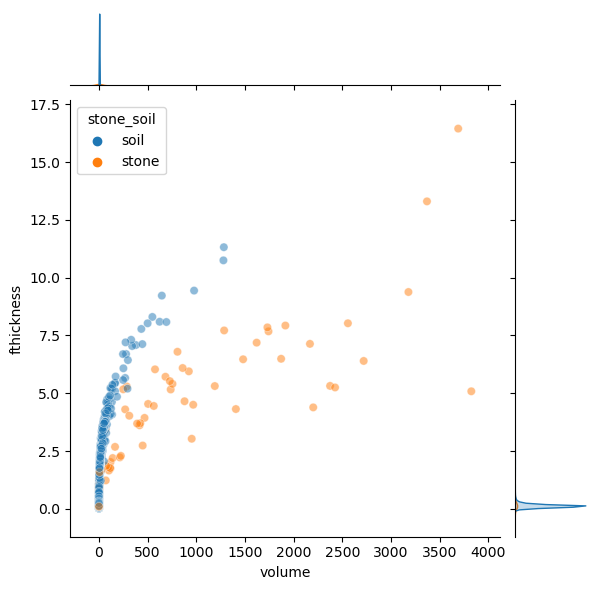

In [4]:
# visualization
# joint plot of thickness and volume
sns.jointplot(
    data = train_data
    ,y = 'fthickness'
    ,x = 'volume'
    ,hue = 'stone_soil'
    ,alpha = 0.5
)

In [5]:
# construct thickness volume product
full_data['thick_vol_prod'] = (full_data['fthickness'] * full_data['volume'])
train_data['thick_vol_prod'] = (train_data['fthickness'] * train_data['volume'])
test_data['thick_vol_prod'] = (test_data['fthickness'] * test_data['volume'])

### Thickness/Perimeter Interaction

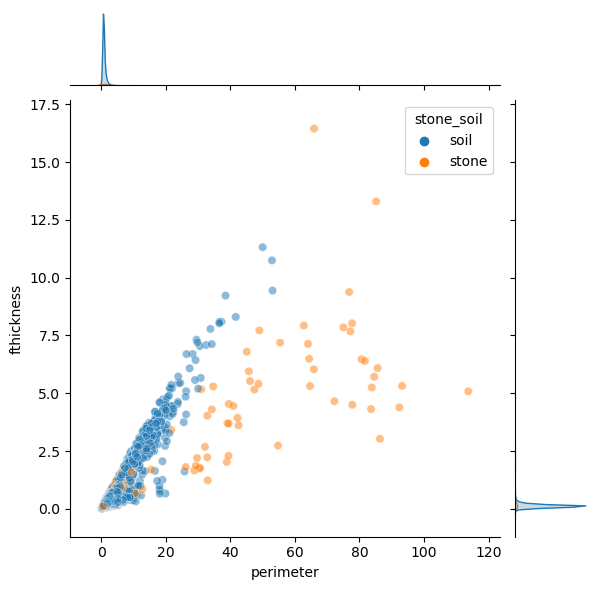

In [6]:
# visualization
# joint plot of thickness and volume
sns.jointplot(
    data = train_data
    ,y = 'fthickness'
    ,x = 'perimeter'
    ,hue = 'stone_soil'
    ,alpha = 0.5
)

In [7]:
# construct thickness perimeter product
full_data['thick_perm_prod'] = (full_data['fthickness'] * full_data['perimeter'])
train_data['thick_perm_prod'] = (train_data['fthickness'] * train_data['perimeter'])
test_data['thick_perm_prod'] = (test_data['fthickness'] * test_data['perimeter'])

### Thickness/Transparency

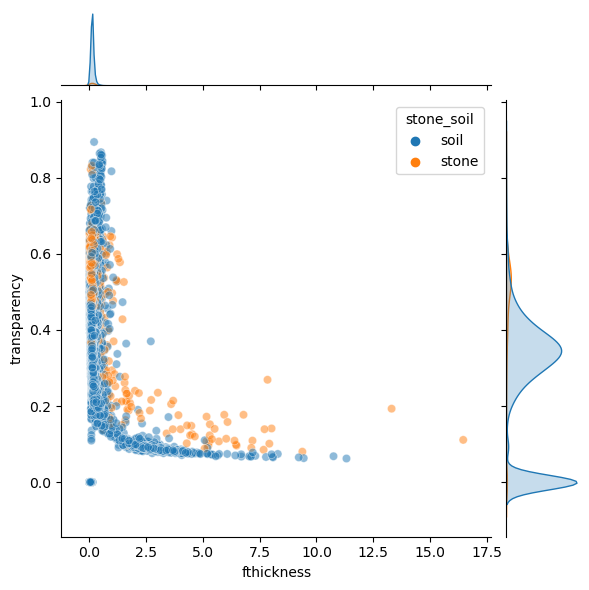

In [8]:
# visualization
# joint plot of thickness and volume
sns.jointplot(
    data = train_data
    ,x = 'fthickness'
    ,y = 'transparency'
    ,hue = 'stone_soil'
    ,alpha = 0.5
)

In [9]:
# construct thickness transparency product
full_data['thick_trans_prod'] = (full_data['fthickness'] * full_data['transparency'])
train_data['thick_trans_prod'] = (train_data['fthickness'] * train_data['transparency'])
test_data['thick_trans_prod'] = (test_data['fthickness'] * test_data['transparency'])

### Ellipticity/Roundness

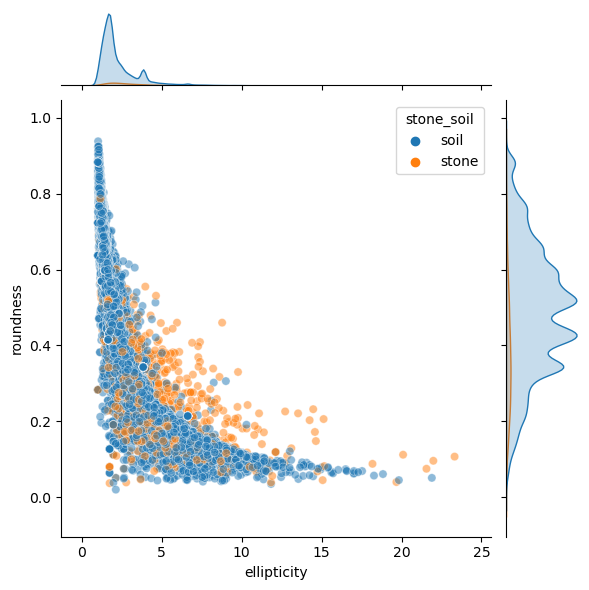

In [10]:
# visualization
# joint plot of roundness and ellipticity
sns.jointplot(
    data = train_data
    ,y = 'roundness'
    ,x = 'ellipticity'
    ,hue = 'stone_soil'
    ,alpha = 0.5
)

In [11]:
# construct roundness ellipticity product
full_data['rnd_ell_prod'] = (full_data['roundness'] * full_data['ellipticity'])
train_data['rnd_ell_prod'] = (train_data['roundness'] * train_data['ellipticity'])
test_data['rnd_ell_prod'] = (test_data['roundness'] * test_data['ellipticity'])

## Rescale Numeric Features

In [12]:
# review numeric variables
full_data.describe()
train_data.describe()
test_data.describe()

,id,img_id,da,dp,fwidth,flength,fthickness,elength,ethickness,ewidth,...,sieve,angularity,ellipticity,fiber_length,fiber_width,krumbein_rnd,thick_vol_prod,thick_perm_prod,thick_trans_prod,rnd_ell_prod
count,15723.000000,15723.000000,15723.000000,15723.000000,15723.000000,15723.000000,15723.000000,15723.000000,15723.000000,15723.000000,...,15723.000000,15723.000000,15723.000000,15723.000000,15723.000000,15723.000000,15723.000000,15723.000000,15723.000000,15723.000000
mean,34301.259620,14388.544871,0.244212,0.301774,0.196241,0.386320,0.173018,0.382713,0.167117,0.189893,...,0.184628,54.748174,2.343466,0.294546,0.104675,0.980618,19.099778,0.889593,0.046946,0.937876
std,22177.396861,6139.794656,0.613160,0.784126,0.663711,1.000803,0.333127,0.980266,0.320086,0.638247,...,0.484045,35.194469,1.398032,1.116759,0.409588,0.082694,1020.132343,18.522487,0.048407,0.159659
min,2.000000,2964.000000,0.040000,0.058000,0.021000,0.074000,0.021000,0.041000,0.014000,0.014000,...,0.021000,0.000000,1.000000,0.000000,0.000000,0.178000,0.000000,0.003843,0.000000,0.055424
25%,14159.000000,9793.000000,0.152000,0.168000,0.112000,0.192000,0.112000,0.179000,0.105000,0.106000,...,0.112000,0.000000,1.524000,0.000000,0.000000,1.000000,0.000112,0.061488,0.000000,0.864552
50%,34018.000000,13418.000000,0.176000,0.202000,0.138000,0.250000,0.135000,0.239000,0.130000,0.132000,...,0.137000,68.000000,1.817000,0.123000,0.028000,1.000000,0.000306,0.084864,0.048430,0.928085
75%,53766.500000,17307.000000,0.239000,0.289000,0.181000,0.378000,0.173000,0.374000,0.167500,0.174000,...,0.177000,85.000000,2.708500,0.311000,0.123500,1.000000,0.000974,0.152245,0.060040,1.003119
max,73313.000000,28051.000000,30.893000,38.251000,36.878000,46.822000,11.437000,47.365000,11.091000,34.444000,...,23.529000,116.667000,21.704000,52.384000,22.823000,1.000000,93677.062167,1223.210430,1.578306,3.230782


In [13]:
# rescaling function
def rescale_numeric_features(df):

    for feature in df: # loop over columns
        if is_float_dtype(df[feature]) == True: # test for floats (leave integers intact)
            df[feature] = MinMaxScaler().fit_transform(df[[feature]]) # rescale

In [14]:
# rescale
rescale_numeric_features(full_data)
rescale_numeric_features(train_data)
rescale_numeric_features(test_data)

In [15]:
# review rescaled numeric variables
full_data.describe()
train_data.describe()
test_data.describe()

,id,img_id,da,dp,fwidth,flength,fthickness,elength,ethickness,ewidth,...,sieve,angularity,ellipticity,fiber_length,fiber_width,krumbein_rnd,thick_vol_prod,thick_perm_prod,thick_trans_prod,rnd_ell_prod
count,15723.000000,15723.000000,15723.000000,15723.000000,15723.000000,15723.000000,15723.000000,15723.000000,15723.000000,15723.000000,...,15723.000000,15723.000000,15723.000000,15723.000000,15723.000000,15723.000000,1.572300e+04,15723.000000,15723.000000,15723.000000
mean,34301.259620,14388.544871,0.006619,0.006383,0.004755,0.006681,0.013316,0.007221,0.013823,0.005109,...,0.006961,0.469269,0.064889,0.005623,0.004586,0.976421,2.038896e-04,0.000724,0.029744,0.277906
std,22177.396861,6139.794656,0.019874,0.020531,0.018008,0.021408,0.029181,0.020714,0.028896,0.018538,...,0.020591,0.301666,0.067525,0.021319,0.017946,0.100601,1.088988e-02,0.015143,0.030670,0.050281
min,2.000000,2964.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,14159.000000,9793.000000,0.003630,0.002880,0.002469,0.002524,0.007971,0.002916,0.008215,0.002672,...,0.003871,0.000000,0.025309,0.000000,0.000000,1.000000,1.195597e-09,0.000047,0.000000,0.254815
50%,34018.000000,13418.000000,0.004408,0.003770,0.003174,0.003765,0.009986,0.004184,0.010472,0.003427,...,0.004934,0.582855,0.039461,0.002348,0.001227,1.000000,3.266541e-09,0.000066,0.030685,0.274823
75%,53766.500000,17307.000000,0.006450,0.006048,0.004341,0.006503,0.013315,0.007037,0.013858,0.004647,...,0.006636,0.728569,0.082520,0.005937,0.005411,1.000000,1.039742e-08,0.000121,0.038041,0.298453
max,73313.000000,28051.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000


## Categorical Features

In [16]:
# define encoder from sklearn package
enc = LabelEncoder()

# use encoder to label soil and stone as 0 and 1 in data
full_data['stone_soil_enc'] = enc.fit_transform(full_data['stone_soil'])
train_data['stone_soil_enc'] = enc.fit_transform(train_data['stone_soil'])
test_data['stone_soil_enc'] = enc.fit_transform(test_data['stone_soil'])

In [17]:
# check output
print(full_data.sample(5))
print(test_data.sample(5))
print(train_data.sample(5))

          id  img_id        da        dp    fwidth   flength  fthickness  \
17203  15001    8696  0.007094  0.005289  0.004639  0.004120    0.010410   
42824  54569   17670  0.004503  0.002932  0.003798  0.001746    0.008523   
12109  19754    9826  0.008326  0.007436  0.004205  0.006721    0.009436   
57662   4539    5682  0.003758  0.002278  0.003120  0.001397    0.007001   
65853  50100   15878  0.001976  0.001152  0.001167  0.000943    0.002618   

        elength  ethickness    ewidth  ...  ellipticity  fiber_length  \
17203  0.005268    0.010917  0.005141  ...     0.027014      0.000000   
42824  0.002416    0.009190  0.004328  ...     0.000000      0.000000   
12109  0.008337    0.009930  0.004676  ...     0.073784      0.007178   
57662  0.002040    0.007093  0.003340  ...     0.005241      0.000000   
65853  0.001485    0.003146  0.001481  ...     0.034898      0.000000   

       fiber_width  krumbein_rnd  stone_soil  thick_vol_prod  thick_perm_prod  \
17203     0.000000     

In [18]:
# check the values in test_data that equal stone (are not visible in head())
# new column is as expected
test_data.loc[test_data['stone_soil'] == 'stone']

,id,img_id,da,dp,fwidth,flength,fthickness,elength,ethickness,ewidth,...,ellipticity,fiber_length,fiber_width,krumbein_rnd,stone_soil,thick_vol_prod,thick_perm_prod,thick_trans_prod,rnd_ell_prod,stone_soil_enc
18,4643,17064,0.005542,0.005420,0.002822,0.006246,0.009110,0.006741,0.009750,0.003137,...,0.094233,0.005956,0.004907,1.000000,stone,4.003114e-09,0.000082,0.034768,0.291088,1
59,1433,16398,0.002334,0.001728,0.001818,0.001818,0.005869,0.002134,0.006681,0.002149,...,0.029221,0.007120,0.005039,1.000000,stone,9.393975e-10,0.000025,0.000000,0.235778,1
61,4738,17110,0.004440,0.004032,0.002985,0.004129,0.009636,0.004226,0.010292,0.003311,...,0.042987,0.000000,0.000000,1.000000,stone,2.796843e-09,0.000068,0.047891,0.242652,1
118,2932,16647,0.004278,0.005184,0.001736,0.006524,0.005606,0.006635,0.006049,0.001946,...,0.162094,0.006013,0.003242,1.000000,stone,9.073726e-10,0.000053,0.023966,0.265139,1
121,3588,16761,0.005802,0.005577,0.003826,0.006289,0.012351,0.006043,0.012368,0.003979,...,0.056076,0.005097,0.006222,1.000000,stone,8.646727e-09,0.000110,0.053784,0.224142,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15663,2229,16525,0.008686,0.007410,0.006457,0.007081,0.020848,0.007586,0.020764,0.006680,...,0.031105,0.000000,0.000000,0.515815,stone,3.870745e-08,0.000224,0.088942,0.281798,1
15665,578,16237,0.002917,0.002985,0.001818,0.003465,0.005869,0.004015,0.005326,0.001714,...,0.105487,0.003894,0.002848,1.000000,stone,9.393975e-10,0.000036,0.032729,0.284365,1
15679,5254,18568,0.004019,0.008902,0.002062,0.010589,0.006657,0.007924,0.005146,0.001656,...,0.235075,0.011244,0.001577,1.000000,stone,3.106417e-09,0.000096,0.034724,0.135902,1
15688,2683,16616,0.011863,0.012018,0.006349,0.012942,0.020498,0.014052,0.020764,0.006680,...,0.091770,0.010862,0.009990,1.000000,stone,6.260871e-08,0.000335,0.063980,0.310414,1


In [19]:
# check new shapes of dataframes are as expected
print(full_data.shape)
print(test_data.shape)
print(train_data.shape)

(78612, 47)
(15723, 47)
(62889, 47)


In [20]:
# write data
# export to csv
full_data.to_csv('data/cumulative_data_fe.csv', index = False)
train_data.to_csv('data/train_data_fe.csv', index = False)
test_data.to_csv('data/test_data_fe.csv', index = False)